# 2024/9/7 権利落ち日前後のアービトラージ有無検証

In [1]:
# 最初に実行しとく共通利用コード
# Python 3.0以降を想定

# %reset # 変数を全てクリアする際にコメアウト外して利用

#!/usr/bin/env python
import sys
from pprint import pprint
import json
from urllib.request import urlopen

def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

API_KEY = '53019dd89432e4f361d35030027d7da2'

## 銘柄一覧取得

In [2]:
# 最初に実行しとく共通利用コード
# Python 3.0以降を想定

# %reset # 変数を全てクリアする際にコメアウト外して利用

#!/usr/bin/env python
import sys
from pprint import pprint
import json
import pandas as pd
import requests




API_KEY = '53019dd89432e4f361d35030027d7da2'

# 銘柄を規模や国、市場などの条件で銘柄を絞り込む
url =f'https://financialmodelingprep.com/api/v3/stock-screener?apikey={API_KEY}'
# 使えるパラメ一覧は右記 https://site.financialmodelingprep.com/developer/docs/stock-screener-api/?direct=true

url +='&limit=1000'
# url +='&country=US'
url +='&exchange=JPX'
# url +='&isEtf=False'
# url +='&isFund=False'
# url +='&sector=Technology'
# url +='&industry=Banks'
url += '&marketCapMoreThan=10000000000'
# url +='&volumeMoreThan=10000'
url +='&dividendMoreThan=1'
# url +='&betaMoreThan=1'

print(url)
got_list = requests.get(url).json()
# print(len(got_list))
# pprint(got_list)

df = pd.DataFrame(got_list)
df['divRate'] = df['lastAnnualDividend'] / df['price']
df_sorted = df.sort_values(by='divRate', ascending=False)

https://financialmodelingprep.com/api/v3/stock-screener?apikey=53019dd89432e4f361d35030027d7da2&limit=1000&exchange=JPX&marketCapMoreThan=10000000000&dividendMoreThan=1


In [3]:
df_filtered = df_sorted[ (df_sorted["divRate"] <=1)&(df_sorted["divRate"] >=0.02)]
df_filtered['symbol']

,symbol
950,2146.T
141,7259.T
800,1419.T
714,3468.T
616,4928.T
...,...
887,3962.T
646,8848.T
744,4368.T
599,6744.T


## 権利落ち日の取得

In [4]:
#url =f'https://financialmodelingprep.com/api/v3/get-all-countries?apikey={API_KEY}'

# base_url = 'https://financialmodelingprep.com/api/v3/stock_dividend_calendar/'
base_url = 'https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/'
# base_url ='https://financialmodelingprep.com/api/v3/income-statement/'
# base_url ='https://financialmodelingprep.com/api/v3/balance-sheet-statement/'
# base_url ='https://financialmodelingprep.com/api/v3/cash-flow-statement/'

API_KEY = '53019dd89432e4f361d35030027d7da2'

# ticker ='AAPL'
# ticker ='9984.T'
# ticker ='8306.T'
ticker = '3289.T'

# period ='annual' # 無料プランではannualしか得られない
# period ='quarter'

#limit ='4' # 無料では5年分のデータまで

from_date = '2014-01-01'
to_date= '2024-08-31'

#url = f"{base_url}?from={from_date}&to={to_date}&apikey={API_KEY}"
url = f"{base_url}{ticker}?from={from_date}&to={to_date}&apikey={API_KEY}"

print(url)
got_list = get_jsonparsed_data(url)
print(len(got_list))
pprint(got_list)


https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/3289.T?from=2014-01-01&to=2024-08-31&apikey=53019dd89432e4f361d35030027d7da2
2
{'historical': [{'adjDividend': 17,
                 'date': '2024-03-28',
                 'declarationDate': '',
                 'dividend': 17,
                 'label': 'March 28, 24',
                 'paymentDate': '',
                 'recordDate': ''},
                {'adjDividend': 14,
                 'date': '2023-09-28',
                 'declarationDate': '',
                 'dividend': 14,
                 'label': 'September 28, 23',
                 'paymentDate': '2023-12-12',
                 'recordDate': '2023-09-30'},
                {'adjDividend': 14.5,
                 'date': '2023-03-30',
                 'declarationDate': '',
                 'dividend': 14.5,
                 'label': 'March 30, 23',
                 'paymentDate': '2023-06-29',
                 'recordDate': '2023-03-31'},
         

In [5]:
import pandas as pd
import datetime
from datetime import timedelta

In [6]:
#url =f'https://financialmodelingprep.com/api/v3/get-all-countries?apikey={API_KEY}'

# base_url = 'https://financialmodelingprep.com/api/v3/stock_dividend_calendar/'
base_url = 'https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/'
# base_url ='https://financialmodelingprep.com/api/v3/income-statement/'
# base_url ='https://financialmodelingprep.com/api/v3/balance-sheet-statement/'
# base_url ='https://financialmodelingprep.com/api/v3/cash-flow-statement/'

API_KEY = '53019dd89432e4f361d35030027d7da2'

# ticker ='AAPL'
# ticker ='9984.T'
# ticker ='8306.T'
ticker = '3289.T'

# period ='annual' # 無料プランではannualしか得られない
# period ='quarter'

#limit ='4' # 無料では5年分のデータまで

from_date = '2014-01-01'
to_date= '2024-08-31'

#url = f"{base_url}?from={from_date}&to={to_date}&apikey={API_KEY}"

ticker_list = list(df_filtered['symbol'][:10])

dividend_date_df = pd.DataFrame()
for ticker in ticker_list:
  url = f"{base_url}{ticker}?from={from_date}&to={to_date}&apikey={API_KEY}"
  #print(url)
  got_list = get_jsonparsed_data(url)
  #print(len(got_list))
  #pprint(got_list)
  one_com_df = pd.DataFrame(got_list["historical"])
  one_com_df["symbol"] = ticker
  dividend_date_df = pd.concat([dividend_date_df, one_com_df], axis=0 )

dividend_date_df

,date,label,adjDividend,dividend,recordDate,paymentDate,declarationDate,symbol
0,2024-03-28,"March 28, 24",96.15,96.15,2024-03-31,2024-06-24,,2146.T
1,2022-03-30,"March 30, 22",24.00,24.00,2022-03-31,2022-06-27,,2146.T
2,2021-03-30,"March 30, 21",34.00,34.00,2021-03-31,2021-06-28,,2146.T
3,2019-03-27,"March 27, 19",25.00,25.00,2019-03-31,2019-06-24,,2146.T
4,2017-03-29,"March 29, 17",16.00,16.00,,,,2146.T
...,...,...,...,...,...,...,...,...
16,2016-03-29,"March 29, 16",34.00,34.00,,,,4507.T
17,2015-09-28,"September 28, 15",28.00,28.00,,,,4507.T
18,2015-03-27,"March 27, 15",28.00,28.00,,,,4507.T
19,2014-09-26,"September 26, 14",24.00,24.00,,,,4507.T


## 配当額の取得

In [23]:

base_url = "https://financialmodelingprep.com/api/v3/historical-price-full/"

price_df = pd.DataFrame()

for symbol in df_filtered['symbol'][:10]:
    url = f"{base_url}{symbol}?from=2014-01-01&to=2024-09-01&apikey={API_KEY}"
    # print(url)
    got_list = requests.get(url).json()
    df_to_concat = pd.DataFrame(got_list['historical'])[['date','close']]
    df_to_concat['symbol'] = symbol
    df_to_concat.insert(0, df_to_concat.columns[-1], df_to_concat.pop(df_to_concat.columns[-1]))
    price_df = pd.concat([price_df, df_to_concat], ignore_index=True)

price_df.to_pickle('price_df.pkl')
price_df

,symbol,date,close
0,2146.T,2024-08-30,2828.00
1,2146.T,2024-08-29,2748.00
2,2146.T,2024-08-28,2725.00
3,2146.T,2024-08-27,2732.00
4,2146.T,2024-08-26,2700.00
...,...,...,...
25724,4507.T,2014-01-10,774.67
25725,4507.T,2014-01-09,768.00
25726,4507.T,2014-01-08,767.33
25727,4507.T,2014-01-07,755.67


権利落ち日前後の株価の取得

In [24]:
#日々の終値のテーブル
dividend_date_df["date"] = pd.to_datetime(dividend_date_df["date"])
price_df["date"] = pd.to_datetime(price_df["date"])
price_df = price_df.reset_index()

#権利落ち前日の価格を取得して結合
dividend_df = pd.merge(dividend_date_df, price_df, on=["date", "symbol"], how="left")
dividend_df["index_plus1"] = dividend_df["index"] +1 #前日のレコードを権利落ち前日として取得するため
price_df = price_df.rename(columns={"index":"index_plus1"})
dividend_df = pd.merge(dividend_df, price_df, on=["symbol", "index_plus1"], how="left" )#前日のレコードを取得
dividend_df = dividend_df.rename(columns = {"date_x":"ex_date",
                                   "close_x":"close_ex_date",
                                   "date_y":"the_day_before_ex",
                                   	"close_y":"close_the_day_before_ex"})
dividend_df

,ex_date,label,adjDividend,dividend,recordDate,paymentDate,declarationDate,symbol,index,close_ex_date,index_plus1,the_day_before_ex,close_the_day_before_ex
0,2024-03-28,"March 28, 24",96.15,96.15,2024-03-31,2024-06-24,,2146.T,107,3525.00,108,2024-03-27,3555.00
1,2022-03-30,"March 30, 22",24.00,24.00,2022-03-31,2022-06-27,,2146.T,596,3080.00,597,2022-03-29,3070.00
2,2021-03-30,"March 30, 21",34.00,34.00,2021-03-31,2021-06-28,,2146.T,840,3505.00,841,2021-03-29,3535.00
3,2019-03-27,"March 27, 19",25.00,25.00,2019-03-31,2019-06-24,,2146.T,1326,2561.00,1327,2019-03-26,2527.00
4,2017-03-29,"March 29, 17",16.00,16.00,,,,2146.T,1837,1433.00,1838,2017-03-28,1351.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016-03-29,"March 29, 16",34.00,34.00,,,,4507.T,25182,1831.00,25183,2016-03-28,1846.00
137,2015-09-28,"September 28, 15",28.00,28.00,,,,4507.T,25304,1493.33,25305,2015-09-25,1526.67
138,2015-03-27,"March 27, 15",28.00,28.00,,,,4507.T,25427,1360.00,25428,2015-03-26,1361.67
139,2014-09-26,"September 26, 14",24.00,24.00,,,,4507.T,25548,827.33,25549,2014-09-25,840.67


In [25]:
#配当額＋価格差と落ち日の価格を比較
dividend_df["価格差(落ち日-前日)"] = dividend_df["close_ex_date"] - dividend_df["close_the_day_before_ex"]
dividend_df["配当額＋価格差"] = dividend_df["adjDividend"]+dividend_df["価格差(落ち日-前日)"]
dividend_df["配当額＋価格差/落ち日価格"] = dividend_df["配当額＋価格差"]/dividend_df["close_ex_date"]
dividend_df

,ex_date,label,adjDividend,dividend,recordDate,paymentDate,declarationDate,symbol,index,close_ex_date,index_plus1,the_day_before_ex,close_the_day_before_ex,価格差(落ち日-前日),配当額＋価格差,配当額＋価格差/落ち日価格
0,2024-03-28,"March 28, 24",96.15,96.15,2024-03-31,2024-06-24,,2146.T,107,3525.00,108,2024-03-27,3555.00,-30.00,66.15,0.018766
1,2022-03-30,"March 30, 22",24.00,24.00,2022-03-31,2022-06-27,,2146.T,596,3080.00,597,2022-03-29,3070.00,10.00,34.00,0.011039
2,2021-03-30,"March 30, 21",34.00,34.00,2021-03-31,2021-06-28,,2146.T,840,3505.00,841,2021-03-29,3535.00,-30.00,4.00,0.001141
3,2019-03-27,"March 27, 19",25.00,25.00,2019-03-31,2019-06-24,,2146.T,1326,2561.00,1327,2019-03-26,2527.00,34.00,59.00,0.023038
4,2017-03-29,"March 29, 17",16.00,16.00,,,,2146.T,1837,1433.00,1838,2017-03-28,1351.00,82.00,98.00,0.068388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016-03-29,"March 29, 16",34.00,34.00,,,,4507.T,25182,1831.00,25183,2016-03-28,1846.00,-15.00,19.00,0.010377
137,2015-09-28,"September 28, 15",28.00,28.00,,,,4507.T,25304,1493.33,25305,2015-09-25,1526.67,-33.34,-5.34,-0.003576
138,2015-03-27,"March 27, 15",28.00,28.00,,,,4507.T,25427,1360.00,25428,2015-03-26,1361.67,-1.67,26.33,0.019360
139,2014-09-26,"September 26, 14",24.00,24.00,,,,4507.T,25548,827.33,25549,2014-09-25,840.67,-13.34,10.66,0.012885


In [26]:
#dividend_dfの各レコードに対して、２ヶ月間の価格を取得（キム分布に使う）
#その銘柄の落ち日前後２ヶ月間の値動きに対して、落ち日前日から翌日にかけての値動きが有意であるかを検定する

#１ヶ月前と１ヶ月後の日付を取得
dividend_df['previous_month'] = dividend_df['ex_date'] - pd.DateOffset(months=1)
dividend_df['next_month'] = dividend_df['ex_date'] + pd.DateOffset(months=1)


two_month_price_df = pd.DataFrame(columns=[ "price_dic_for_two_month",
                                                 "price_list_for_two_month",
                                                 "価格差(1日ズレ)",
                                                 "価格差/後日の価格"])
for index in dividend_df.index:
  one_record_dividend_seri = dividend_df.iloc[index]

  # 期間内のレコードを取得
  filtered_df_of_one_record = price_df[   (price_df['symbol'] == one_record_dividend_seri["symbol"]) &
                                            (price_df['date'] >= one_record_dividend_seri["previous_month"]) &
                                            (price_df['date'] <= one_record_dividend_seri["next_month"])
                                        ]

  price_dic = dict(zip(filtered_df_of_one_record["date"], filtered_df_of_one_record['close']))#2ヶ月分の価格を辞書型にしておく
  value_list = list(price_dic.values()) #2ヶ月分の価格リスト
  diff_list_for_two_month = [ value_list[i] - value_list[i+1] for i in range(len(value_list)-1 ) ]#前後二日間の価格差リスト
  rate_of_diff_list_for_two_month = [ diff_list_for_two_month[i]/value_list[i+1] for i in range(len(diff_list_for_two_month)) ]#前後二日間の価格差の割合リスト
  two_month_price_df.loc[index] = [ price_dic, value_list, diff_list_for_two_month, rate_of_diff_list_for_two_month ]

dividend_df = dividend_df.join(two_month_price_df)
dividend_df

,ex_date,label,adjDividend,dividend,recordDate,paymentDate,declarationDate,symbol,index,close_ex_date,...,close_the_day_before_ex,価格差(落ち日-前日),配当額＋価格差,配当額＋価格差/落ち日価格,previous_month,next_month,price_dic_for_two_month,price_list_for_two_month,価格差(1日ズレ),価格差/後日の価格
0,2024-03-28,"March 28, 24",96.15,96.15,2024-03-31,2024-06-24,,2146.T,107,3525.00,...,3555.00,-30.00,66.15,0.018766,2024-02-28,2024-04-28,"{2024-04-26 00:00:00: 3335.0, 2024-04-25 00:00...","[3335.0, 3310.0, 3425.0, 3370.0, 3370.0, 3325....","[25.0, -115.0, 55.0, 0.0, 45.0, -50.0, -15.0, ...","[0.0075528700906344415, -0.033576642335766425,..."
1,2022-03-30,"March 30, 22",24.00,24.00,2022-03-31,2022-06-27,,2146.T,596,3080.00,...,3070.00,10.00,34.00,0.011039,2022-02-28,2022-04-30,"{2022-04-28 00:00:00: 2949.0, 2022-04-27 00:00...","[2949.0, 2890.0, 2928.0, 2897.0, 2948.0, 2969....","[59.0, -38.0, 31.0, -51.0, -21.0, 12.0, 59.0, ...","[0.02041522491349481, -0.012978142076502733, 0..."
2,2021-03-30,"March 30, 21",34.00,34.00,2021-03-31,2021-06-28,,2146.T,840,3505.00,...,3535.00,-30.00,4.00,0.001141,2021-02-28,2021-04-30,"{2021-04-30 00:00:00: 3635.0, 2021-04-28 00:00...","[3635.0, 3665.0, 3670.0, 3630.0, 3555.0, 3650....","[-30.0, -5.0, 40.0, 75.0, -95.0, 65.0, -55.0, ...","[-0.008185538881309686, -0.0013623978201634877..."
3,2019-03-27,"March 27, 19",25.00,25.00,2019-03-31,2019-06-24,,2146.T,1326,2561.00,...,2527.00,34.00,59.00,0.023038,2019-02-27,2019-04-27,"{2019-04-26 00:00:00: 3180.0, 2019-04-25 00:00...","[3180.0, 3115.0, 3035.0, 3040.0, 3100.0, 3095....","[65.0, 80.0, -5.0, -60.0, 5.0, 95.0, -105.0, 2...","[0.02086677367576244, 0.026359143327841845, -0..."
4,2017-03-29,"March 29, 17",16.00,16.00,,,,2146.T,1837,1433.00,...,1351.00,82.00,98.00,0.068388,2017-02-28,2017-04-29,"{2017-04-28 00:00:00: 1448.0, 2017-04-27 00:00...","[1448.0, 1440.0, 1355.0, 1373.0, 1336.0, 1326....","[8.0, 85.0, -18.0, 37.0, 10.0, 22.0, -2.0, -30...","[0.005555555555555556, 0.06273062730627306, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016-03-29,"March 29, 16",34.00,34.00,,,,4507.T,25182,1831.00,...,1846.00,-15.00,19.00,0.010377,2016-02-29,2016-04-29,"{2016-04-28 00:00:00: 1881.0, 2016-04-27 00:00...","[1881.0, 1926.66, 1946.66, 1950.0, 1960.33, 19...","[-45.66000000000008, -20.0, -3.339999999999918...","[-0.02369904394132856, -0.010274007787697903, ..."
137,2015-09-28,"September 28, 15",28.00,28.00,,,,4507.T,25304,1493.33,...,1526.67,-33.34,-5.34,-0.003576,2015-08-28,2015-10-28,"{2015-10-28 00:00:00: 1448.33, 2015-10-27 00:0...","[1448.33, 1435.0, 1413.33, 1383.33, 1371.67, 1...","[13.329999999999927, 21.670000000000073, 30.0,...","[0.009289198606271726, 0.015332583331564514, 0..."
138,2015-03-27,"March 27, 15",28.00,28.00,,,,4507.T,25427,1360.00,...,1361.67,-1.67,26.33,0.019360,2015-02-27,2015-04-27,"{2015-04-27 00:00:00: 1381.67, 2015-04-24 00:0...","[1381.67, 1380.0, 1413.33, 1430.0, 1388.33, 13...","[1.6700000000000728, -33.32999999999993, -16.6...","[0.0012101449275362846, -0.02358260278915747, ..."
139,2014-09-26,"September 26, 14",24.00,24.00,,,,4507.T,25548,827.33,...,840.67,-13.34,10.66,0.012885,2014-08-26,2014-10-26,"{2014-10-24 00:00:00: 871.0, 2014-10-23 00:00:...","[871.0, 868.33, 838.67, 811.67, 822.0, 780.67,...","[2.669999999999959, 29.660000000000082, 27.0, ...","[0.003074867849780566, 0.03536551921494758, 0...."


In [27]:
from scipy import stats
#企業ごとにp値を出す



#企業ごとのp値を算出する
p_value_df = pd.DataFrame(columns=[ "symbol", "t統計量", "p値"])

for index, symbol in enumerate(dividend_df["symbol"].unique()):

  one_symbol_df = dividend_df[dividend_df["symbol"] == symbol]
  # キム仮説と対立仮説のデータを取得
  #2ヶ月の全データ(キム仮説)
  two_month_all_list = []
  for one_list in list(one_symbol_df["価格差/後日の価格"]):
    [two_month_all_list.append(i) for i in one_list ]
  #権利落ち日のデータ(対立仮説)
  dividend_only_list = []
  dividend_only_list = list(one_symbol_df["配当額＋価格差/落ち日価格"])

  # t検定を実行
  t_stat, p_value = stats.ttest_ind(dividend_only_list, two_month_all_list,  alternative='less', equal_var=False)#片側でウェルチ検定(サンプルサイズが異なるので、等分散性はないと仮定)
  # print("t統計量:", t_stat)
  # print("p値:", p_value)

  p_value_df.loc[index] = [symbol, t_stat, p_value]

p_value_df

,symbol,t統計量,p値
0,2146.T,3.141813,0.992879
1,7259.T,8.599980,1.000000
2,1419.T,-2.249300,0.022771
3,3468.T,-0.453867,0.327815
4,4928.T,-0.552470,0.296943
5,8125.T,-0.759540,0.232261
6,4704.T,2.373931,0.979852
7,6432.T,-0.053499,0.479159
8,5451.T,-0.055611,0.478090
9,4507.T,5.708182,0.999994


In [18]:
import matplotlib.pyplot as plt


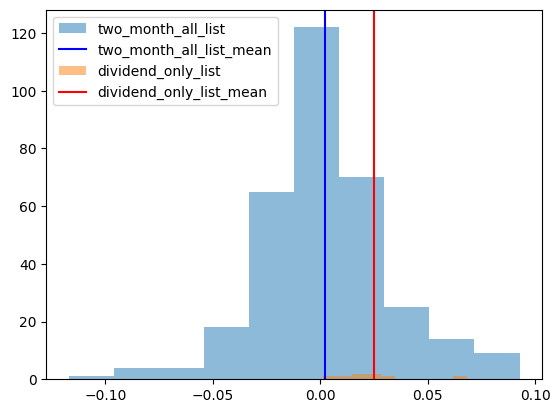

In [28]:
#個別確認
#2146.T	UT Groupのp値高い件(たまたまの可能性が高い)

symbol = '2146.T'

one_symbol_df = dividend_df[dividend_df["symbol"] == symbol]
# キム仮説と対立仮説のデータを取得
#2ヶ月の全データ(キム仮説)
two_month_all_list = []
for one_list in list(one_symbol_df["価格差/後日の価格"]):
  [two_month_all_list.append(i) for i in one_list ]
#権利落ち日のデータ(対立仮説)
dividend_only_list = []
dividend_only_list = list(one_symbol_df["配当額＋価格差/落ち日価格"])

plt.hist(two_month_all_list, bins=10, alpha=0.5, label='two_month_all_list')
plt.axvline(x=sum(two_month_all_list)/len(two_month_all_list), color='b',  label='two_month_all_list_mean')
plt.hist(dividend_only_list, bins=10, alpha=0.5, label='dividend_only_list')
plt.axvline(x=sum(dividend_only_list)/len(dividend_only_list), color='r', label='dividend_only_list_mean' )
plt.legend()

#↓サンプルが少ない過ぎるためっぽい、、

In [29]:
result = dividend_df.groupby('symbol')['配当額＋価格差/落ち日価格'].agg(['median', 'var', 'count'])
sorted_result = result.sort_values(by='median', ascending=False)
sorted_result

,median,var,count
symbol,,,
7259.T,0.031063,0.000362,20
4507.T,0.023677,0.000339,21
2146.T,0.022137,0.000388,8
4704.T,0.008692,0.000242,10
5451.T,0.005622,0.000366,21
8125.T,0.002336,0.000602,11
3468.T,0.001129,0.000115,17
6432.T,-0.001495,0.000523,11
4928.T,-0.007787,0.000649,10


In [30]:
company_names = []
for symbol in sorted_result.index:
    url = f'https://financialmodelingprep.com/api/v3/profile/{symbol}?apikey=53019dd89432e4f361d35030027d7da2'
    company_names.append(requests.get(url).json()[0]['companyName'])

sorted_result['name'] = company_names
sorted_result.insert(0, sorted_result.columns[-1], sorted_result.pop(sorted_result.columns[-1]))
sorted_result

,name,median,var,count
symbol,,,,
7259.T,Aisin Corporation,0.031063,0.000362,20
4507.T,"Shionogi & Co., Ltd.",0.023677,0.000339,21
2146.T,"UT Group Co., Ltd.",0.022137,0.000388,8
4704.T,Trend Micro Incorporated,0.008692,0.000242,10
5451.T,"Yodogawa Steel Works, Ltd.",0.005622,0.000366,21
8125.T,"Wakita & Co.,LTD.",0.002336,0.000602,11
3468.T,Star Asia Investment Corporation,0.001129,0.000115,17
6432.T,"Takeuchi Mfg. Co., Ltd.",-0.001495,0.000523,11
4928.T,"Noevir Holdings Co., Ltd.",-0.007787,0.000649,10


In [31]:
sorted_result = sorted_result.reset_index()
sorted_result

,symbol,name,median,var,count
0,7259.T,Aisin Corporation,0.031063,0.000362,20
1,4507.T,"Shionogi & Co., Ltd.",0.023677,0.000339,21
2,2146.T,"UT Group Co., Ltd.",0.022137,0.000388,8
3,4704.T,Trend Micro Incorporated,0.008692,0.000242,10
4,5451.T,"Yodogawa Steel Works, Ltd.",0.005622,0.000366,21
5,8125.T,"Wakita & Co.,LTD.",0.002336,0.000602,11
6,3468.T,Star Asia Investment Corporation,0.001129,0.000115,17
7,6432.T,"Takeuchi Mfg. Co., Ltd.",-0.001495,0.000523,11
8,4928.T,"Noevir Holdings Co., Ltd.",-0.007787,0.000649,10
9,1419.T,"Tama Home Co., Ltd.",-0.017884,0.001191,12


(0.0, 0.05)

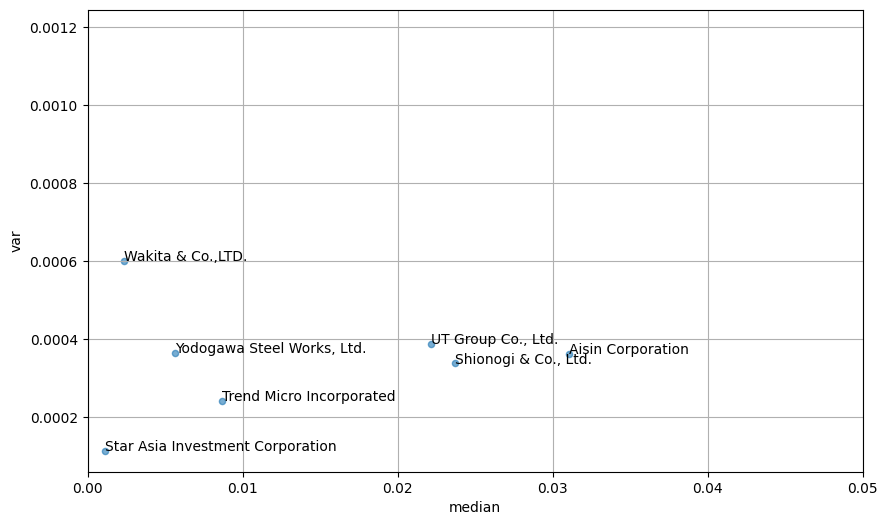

In [32]:
#第一象限にあるものだけ描画
plt.figure(figsize=(10, 6))
plt.scatter( sorted_result["median"], sorted_result["var"], alpha=0.6, s=20 )
plt.xlabel("median")
plt.ylabel("var")
plt.grid()


for i, txt in enumerate(sorted_result["name"]):
    plt.annotate(txt, (sorted_result["median"].values[i], sorted_result["var"].values[i]) )

#plt.ylim( 0,  )
plt.xlim( 0, 0.05)

In [33]:
dividend_df = pd.merge( dividend_df, sorted_result.reset_index().loc[:,["symbol", "name"]], on="symbol" )

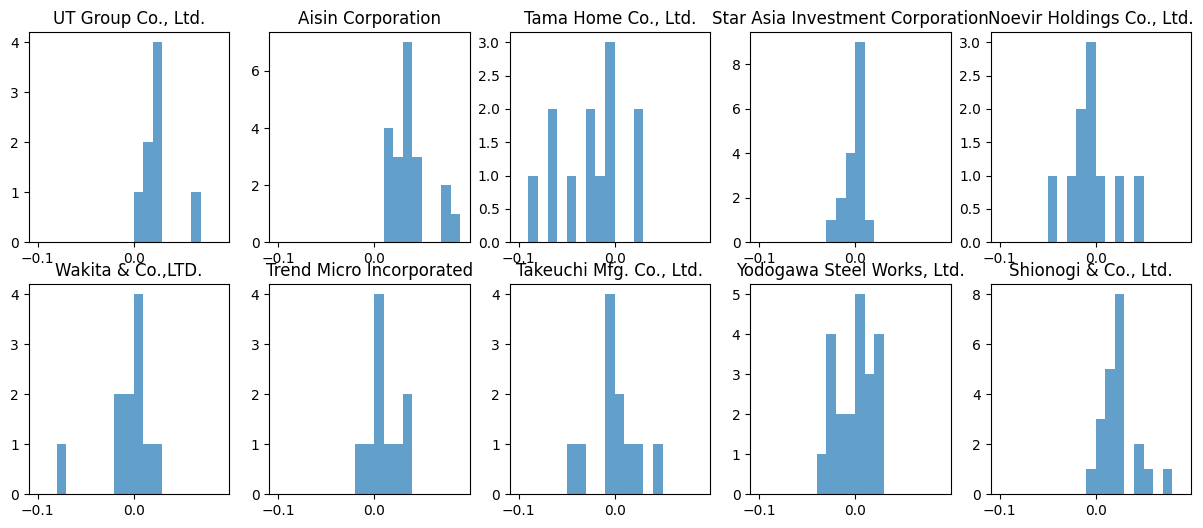

In [34]:
#target_symbol = "2146.T"
target_symbol_list = dividend_df["name"].unique()


bin_list=[ i*0.01 for i in range(-10, 10) ]
plt.figure(figsize=(15,6))
for index, target_symbol in enumerate(target_symbol_list):
  plt.subplot(2, 5, index+1)
  one_symbol_df = dividend_df[dividend_df["name"] == target_symbol]
  #plt.figure(figsize=(4,3))
  plt.title(target_symbol)
  plt.hist(one_symbol_df["配当額＋価格差/落ち日価格"],
           bins=bin_list,
           alpha=0.7);



UTグループ、アイシン、シオノギとかいいかも